In [1]:
import seaborn as sns
import os
from time import time
import pprint
from sklearn.utils import shuffle
import numpy as np
from pandas.plotting import table
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time
pp = pprint.PrettyPrinter(indent=4, compact=True)

"""create dfs"""
dems = pd.read_csv('data\\dems_cleaned_up.csv')

cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']

"""Candidate dataframes"""
biden = dems[dems['candidate'] == 'Biden']
booker = dems[dems['candidate'] == 'Booker']
buttig= dems[dems['candidate'] == 'Buttigieg']
dnc = dems[dems['candidate'] == 'DNC']
gabbard = dems[dems['candidate'] == 'Gabbard']
klob = dems[dems['candidate'] == 'Klobuchar']
sanders = dems[dems['candidate'] =='Sanders']
steyer= dems[dems['candidate'] =='Steyer']
warren = dems[dems['candidate'] == 'Warren']
yang = dems[dems['candidate'] == 'Yang']

dems.head(2)

,Unnamed: 0,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num
0,0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6
1,1,2019-12-02 18:36:50+00:00,"Between the Ectopic pregnancy BS, the financia...",between ectopic pregnancy bs financial bs heal...,"Sentiment(polarity=0.20000000000000004, subjec...",0.2,0.466667,1,0,"gop, bernie2020, nurseswhotweet, trumpcult",NaN,Sanders,2019-12-02,6


count    60208.000000
mean        10.616679
std        171.787663
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      19606.000000
Name: favorite_count, dtype: float64


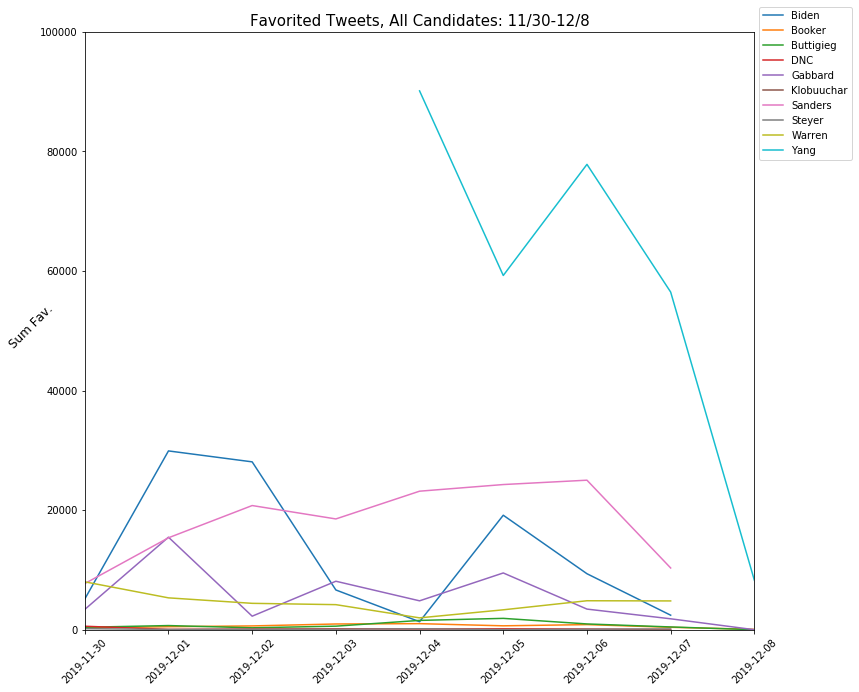

In [2]:
temp_term = ['day', 'candidate', 'favorite_count']
metric = 'sum'
print(dems['favorite_count'].describe())



temp_biden = biden[temp_term].groupby(['day']).agg(metric)
temp_booker = booker[temp_term].groupby(['day']).agg(metric)
temp_buttig = buttig[temp_term].groupby(['day']).agg(metric)
temp_dnc = dnc[temp_term].groupby(['day']).agg(metric)
temp_gabbard = gabbard[temp_term].groupby(['day']).agg(metric)
temp_klob = klob[temp_term].groupby(['day']).agg(metric)
temp_sanders = sanders[temp_term].groupby(['day']).agg(metric)
temp_steyer = steyer[temp_term].groupby(['day']).agg(metric)
temp_warren = warren[temp_term].groupby(['day']).agg(metric)
temp_yang = yang[temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.plot(kind='line', legend=False, figsize=(12,11))
plt.ylim(0.0, 100000)
plt.ylabel('Sum Fav.', fontsize=12, rotation=45)
plt.xticks(rotation=45)
plt.title('Favorited Tweets, All Candidates: 11/30-12/8'.format(metric), fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\favorite_all.png')
plt.show()

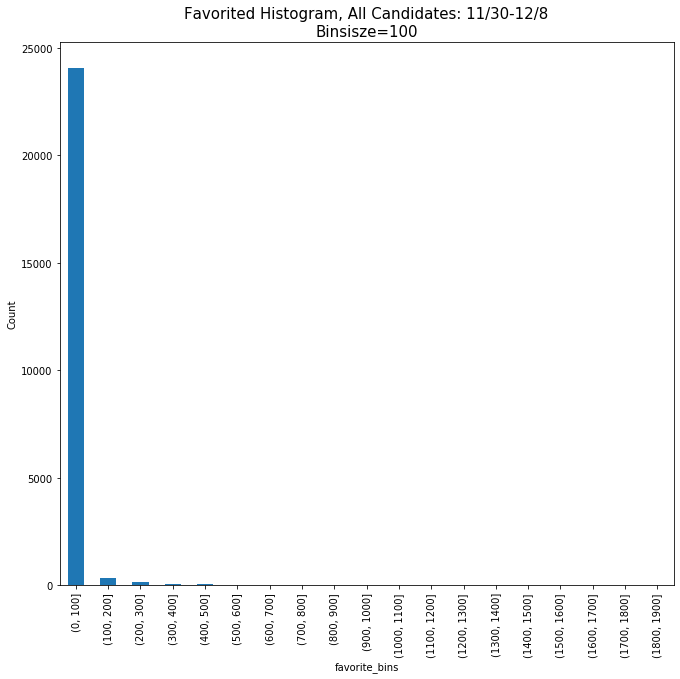

In [4]:
time0 = time()
bins = np.arange(0, 2000, 100)
dems['favorite_bins'] = pd.cut(dems['favorite_count'], bins=bins)#, labels=labels)

dems.groupby(['favorite_bins']).size().plot(kind='bar', figsize=(11,10))
plt.title('Favorited Histogram, All Candidates: 11/30-12/8\nBinsisze=100', fontsize=15)
plt.ylabel('Count')
plt.savefig('charts\\favorite_hist_all.png')
plt.show()

In [4]:
dems['favorite_bins'].value_counts().iloc[:10]

(0, 100]        24084
(100, 200]        340
(200, 300]        135
(300, 400]         63
(400, 500]         42
(500, 600]         41
(700, 800]         17
(600, 700]         16
(800, 900]         12
(1400, 1500]       10
Name: favorite_bins, dtype: int64

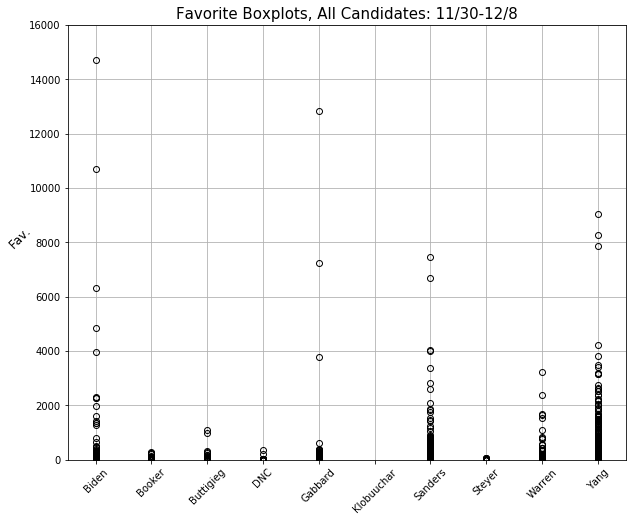

In [7]:
temp_term = ['favorite_count']

temp_biden = biden[temp_term]
temp_booker = booker[temp_term]
temp_buttig = buttig[temp_term]
temp_dnc = dnc[temp_term]
temp_gabbard = gabbard[temp_term]
temp_klob = klob[temp_term]
temp_sanders = sanders[temp_term]
temp_steyer = steyer[temp_term]
temp_warren = warren[temp_term]
temp_yang = yang[temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(0.0, 1.6e4)
plt.ylabel('Fav.', fontsize=12, rotation=45)
plt.xticks(rotation=45)
plt.title('Favorite Boxplots, All Candidates: 11/30-12/8'.format(metric), fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\favorite_box_all')
plt.show()